# Game Analysis

In [44]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Team Data

In [45]:
# Load team data
teams_data = pd.read_csv('data/relevant_data/MTeams.csv')
teams_data.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2025
1,1102,Air Force,1985,2025
2,1103,Akron,1985,2025
3,1104,Alabama,1985,2025
4,1105,Alabama A&M,2000,2025


### Regular Season Data

In [46]:
# Load the regular season game data
reg_season_data = pd.read_csv('data/relevant_data/MRegularSeasonDetailedResults.csv')
reg_season_data.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


In [47]:
# Select data only from the last 10 seasons
recent_reg_season_data = reg_season_data[reg_season_data['Season'] >= 2015]
recent_reg_season_data.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
60518,2015,11,1103,74,1420,57,H,0,25,53,...,12,14,28,12,23,13,16,9,0,19
60519,2015,11,1104,82,1406,54,H,0,29,63,...,21,11,15,14,20,9,22,2,2,20
60520,2015,11,1112,78,1291,55,H,0,31,54,...,21,8,12,4,24,8,16,2,0,17
60521,2015,11,1113,86,1152,50,H,0,30,49,...,20,13,23,15,16,7,17,5,3,30
60522,2015,11,1119,84,1102,78,H,0,30,61,...,19,10,15,15,17,14,18,8,6,21


In [48]:
# Save the recent regular season data to a new CSV file for future use
recent_reg_season_data.to_csv('data/processed/RecentMRegularSeasonDetailedResults.csv', index=False)

In [49]:
# Insert the team names for the winning and losing teams in the regular season data based on the team IDs
recent_reg_season_data = recent_reg_season_data.merge(teams_data[['TeamID', 'TeamName']], left_on='WTeamID', right_on='TeamID', how='left')
recent_reg_season_data = recent_reg_season_data.rename(columns={'TeamName': 'WTeamName'})
recent_reg_season_data = recent_reg_season_data.merge(teams_data[['TeamID', 'TeamName']], left_on='LTeamID', right_on='TeamID', how='left')
recent_reg_season_data = recent_reg_season_data.rename(columns={'TeamName': 'LTeamName'})
recent_reg_season_data = recent_reg_season_data.drop(['TeamID_x'], axis=1)
recent_reg_season_data = recent_reg_season_data.drop(['TeamID_y'], axis=1)

recent_reg_season_data.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WTeamName,LTeamName
0,2015,11,1103,74,1420,57,H,0,25,53,...,28,12,23,13,16,9,0,19,Akron,UMBC
1,2015,11,1104,82,1406,54,H,0,29,63,...,15,14,20,9,22,2,2,20,Alabama,Towson
2,2015,11,1112,78,1291,55,H,0,31,54,...,12,4,24,8,16,2,0,17,Arizona,Mt St Mary's
3,2015,11,1113,86,1152,50,H,0,30,49,...,23,15,16,7,17,5,3,30,Arizona St,Chicago St
4,2015,11,1119,84,1102,78,H,0,30,61,...,15,15,17,14,18,8,6,21,Army,Air Force


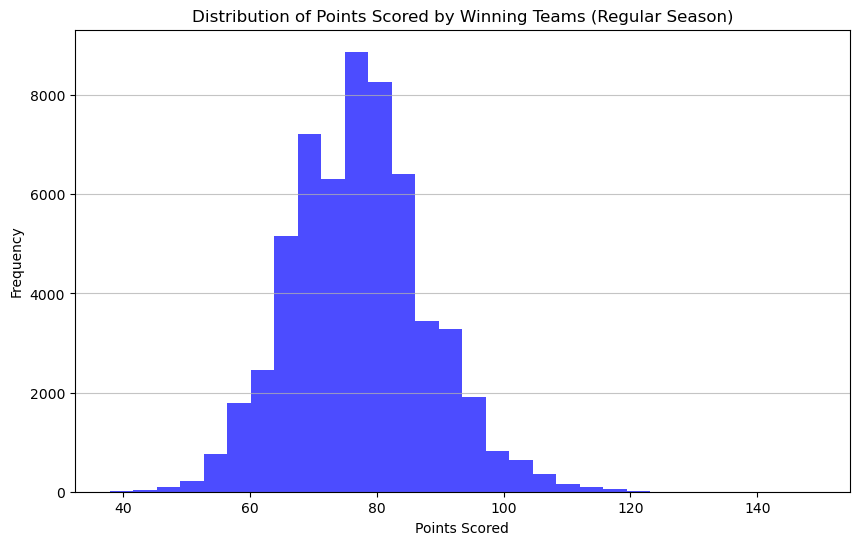

In [50]:
# Visualize the distribution of points scored by winning teams in the regular season
plt.figure(figsize=(10, 6))
plt.hist(recent_reg_season_data['WScore'], bins=30, alpha=0.7, color='blue')
plt.title('Distribution of Points Scored by Winning Teams (Regular Season)')
plt.xlabel('Points Scored')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

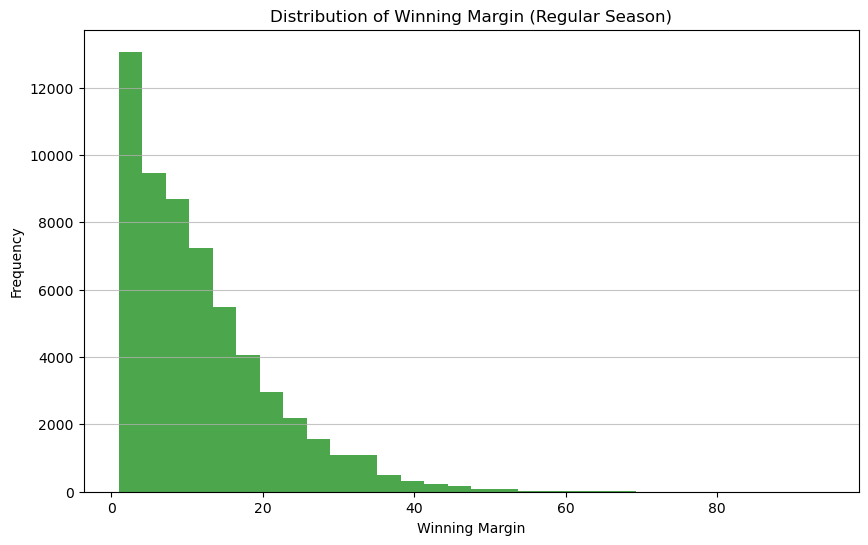

In [51]:
# Visualize the winning margin distribution for regular season games
recent_reg_season_data['WinningMargin'] = recent_reg_season_data['WScore'] - recent_reg_season_data['LScore']
plt.figure(figsize=(10, 6))
plt.hist(recent_reg_season_data['WinningMargin'], bins=30, alpha=0.7, color='green')
plt.title('Distribution of Winning Margin (Regular Season)')
plt.xlabel('Winning Margin')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

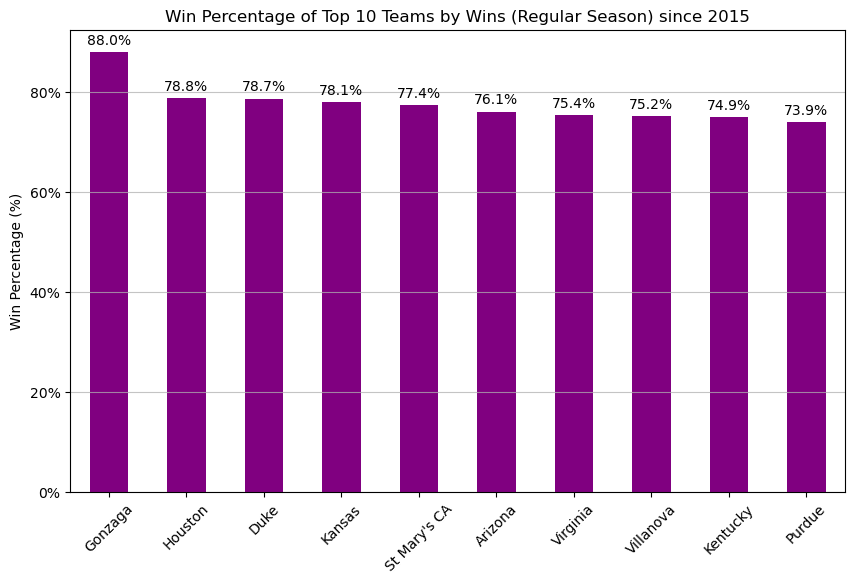

In [52]:
# Visualize true win percentage for the top 10 teams by total wins (since 2015) then sort from highest to lowest win percentage
team_wins = recent_reg_season_data.groupby('WTeamName').size().rename('Wins')
team_losses = recent_reg_season_data.groupby('LTeamName').size().rename('Losses')
team_records = pd.concat([team_wins, team_losses], axis=1).fillna(0)
team_records['Games'] = team_records['Wins'] + team_records['Losses']
team_records['WinPct'] = (team_records['Wins'] / team_records['Games']) * 100

top_teams = team_records.sort_values('Wins', ascending=False).head(10)
top_teams = top_teams.sort_values('WinPct', ascending=False)

plt.figure(figsize=(10, 6))
ax = top_teams['WinPct'].plot(kind='bar', color='purple')
ax.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())
plt.title('Win Percentage of Top 10 Teams by Wins (Regular Season) since 2015')
ax.bar_label(ax.containers[0], fmt="%.1f%%", padding=3)
plt.ylabel('Win Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()

### Tourney Data

In [53]:
# Load tournament game data
tourney_data = pd.read_csv('data/relevant_data/MNCAATourneyDetailedResults.csv')
tourney_data.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19


In [54]:
# Select data only from the last 10 seasons
recent_tourney_data = tourney_data[tourney_data['Season'] >= 2015]
recent_tourney_data.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
780,2015,134,1214,74,1264,64,N,0,26,53,...,25,12,21,12,29,15,17,5,3,25
781,2015,134,1279,94,1140,90,N,0,36,80,...,29,19,27,6,33,22,15,0,2,23
782,2015,135,1173,56,1129,55,N,0,20,42,...,20,5,10,12,21,10,9,5,1,18
783,2015,135,1352,81,1316,77,N,0,28,62,...,22,18,26,13,29,15,19,1,4,23
784,2015,136,1112,93,1411,72,N,0,32,53,...,12,19,30,8,11,5,9,5,3,19


In [55]:
# Save the tournament data to a new CSV file for future use
recent_tourney_data.to_csv('data/processed/RecentMNCAATourneyDetailedResults.csv', index=False)

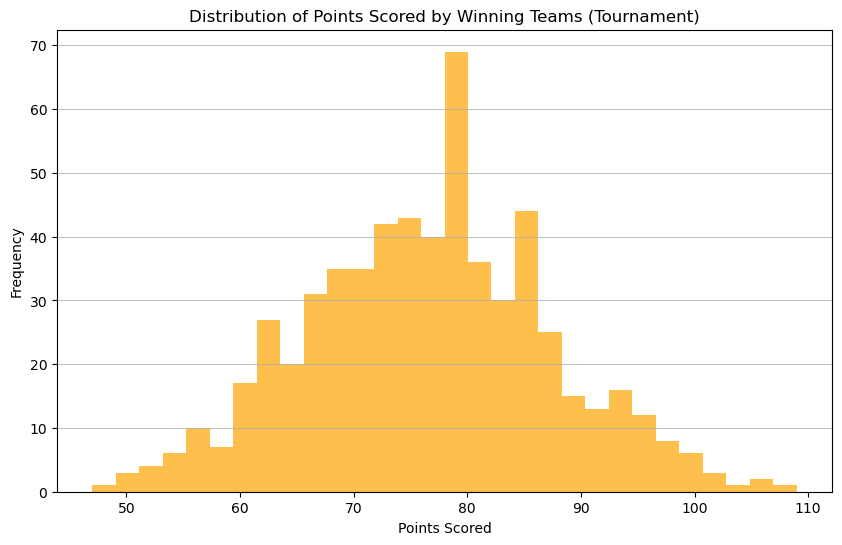

In [56]:
# Visualize the distribution of points scored by winning teams in the tournament
plt.figure(figsize=(10, 6))
plt.hist(recent_tourney_data['WScore'], bins=30, alpha=0.7, color='orange')
plt.title('Distribution of Points Scored by Winning Teams (Tournament)')
plt.xlabel('Points Scored')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

/var/folders/nn/xry2610j7qv13k6pqj1x8xkw0000gn/T/ipykernel_15386/2711045984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recent_tourney_data['WinningMargin'] = recent_tourney_data['WScore'] - recent_tourney_data['LScore']


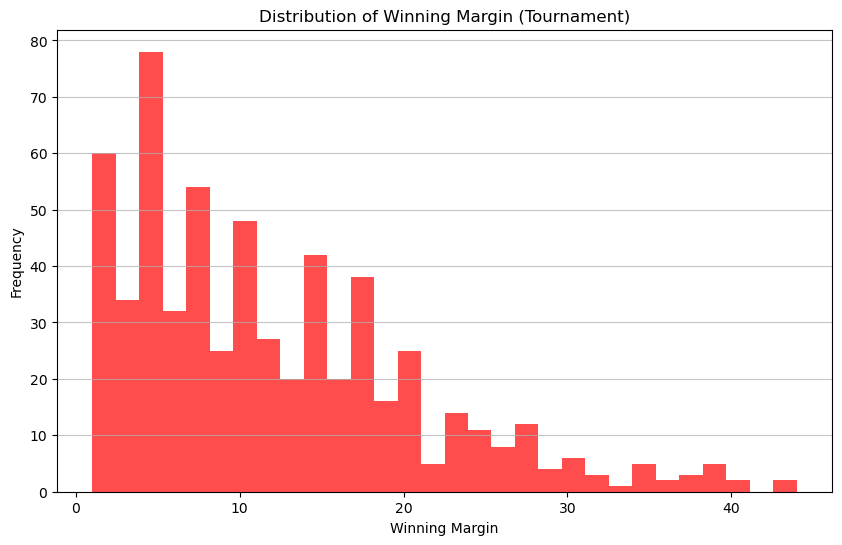

In [57]:
# Visualize the winning margin distribution for regular season games
recent_tourney_data['WinningMargin'] = recent_tourney_data['WScore'] - recent_tourney_data['LScore']
plt.figure(figsize=(10, 6))
plt.hist(recent_tourney_data['WinningMargin'], bins=30, alpha=0.7, color='red')
plt.title('Distribution of Winning Margin (Tournament)')
plt.xlabel('Winning Margin')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

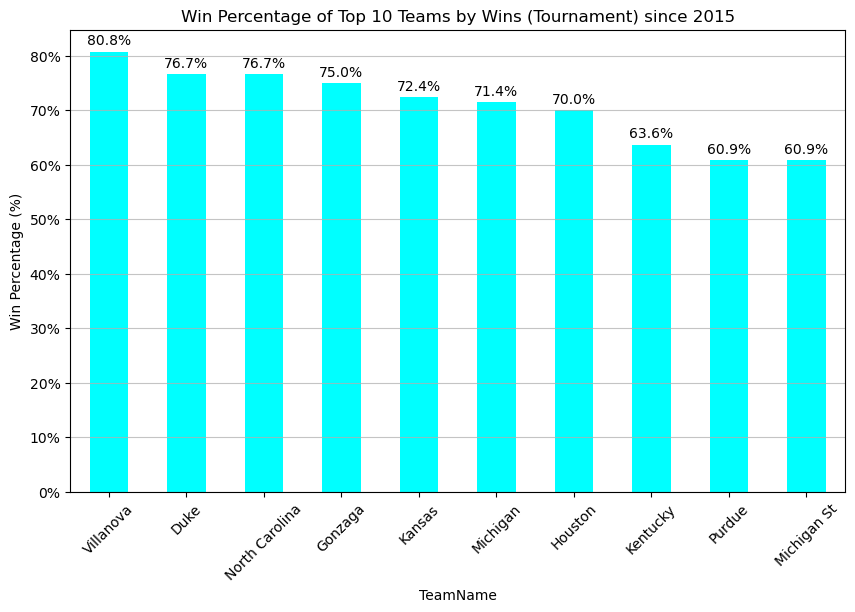

In [58]:
# Visualize true win percentage for the top 10 teams by total wins (since 2015) then sort from highest to lowest win percentage
tourney_team_wins = recent_tourney_data.groupby('WTeamID').size().rename('Wins')
tourney_team_losses = recent_tourney_data.groupby('LTeamID').size().rename('Losses')
tourney_team_records = pd.concat([tourney_team_wins, tourney_team_losses], axis=1).fillna(0)
tourney_team_records['Games'] = tourney_team_records['Wins'] + tourney_team_records['Losses']
tourney_team_records['WinPct'] = (tourney_team_records['Wins'] / tourney_team_records['Games']) * 100
tourney_team_records = tourney_team_records.merge(teams_data[['TeamID', 'TeamName']], left_index=True, right_on='TeamID', how='left')
tourney_team_records = tourney_team_records.drop(['TeamID'], axis=1)
tourney_team_records = tourney_team_records.sort_values('Wins', ascending=False).head(10)
tourney_team_records = tourney_team_records.sort_values('WinPct', ascending=False)
plt.figure(figsize=(10, 6))
ax = tourney_team_records.set_index('TeamName')['WinPct'].plot(kind='bar', color='cyan')
ax.yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter())
plt.title('Win Percentage of Top 10 Teams by Wins (Tournament) since 2015')
ax.bar_label(ax.containers[0], fmt="%.1f%%", padding=3)
plt.ylabel('Win Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()